In [1]:
from pathlib import Path
import sys
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

REPO_ROOT = Path("..").resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.append(str(REPO_ROOT))

from apclust import load_matrix, run_mcss_ap

In [2]:
DATA_ROOT = REPO_ROOT / "Data"
vdx = load_matrix(DATA_ROOT / "vdx_dict.npy", key="HK_3")

scaler = StandardScaler()
X_std = scaler.fit_transform(vdx.values)

In [1]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

n = 10  # imagine your dataset has 10 samples
X = np.arange(n).reshape(-1, 1)

def show_split(seed):
    splitter = ShuffleSplit(n_splits=3, train_size=0.8, random_state=seed)
    print(f"random_seed = {seed}")
    for b, (train_idx, test_idx) in enumerate(splitter.split(X), start=1):
        print(f"  iter {b} train: {train_idx}, test: {test_idx}")
    print()

# try two different seeds
show_split(seed=0)
show_split(seed=1)

random_seed = 0
  iter 1 train: [4 9 1 6 7 3 0 5], test: [2 8]
  iter 2 train: [1 2 9 8 0 6 7 4], test: [3 5]
  iter 3 train: [8 4 5 1 0 6 9 7], test: [2 3]

random_seed = 1
  iter 1 train: [6 4 0 3 1 7 8 5], test: [2 9]
  iter 2 train: [3 0 8 4 2 1 6 7], test: [9 5]
  iter 3 train: [5 9 0 6 1 7 4 2], test: [8 3]



In [8]:
show_split(seed=1)

random_seed = 1
  iter 1 train: [6 4 0 3 1 7 8 5], test: [2 9]
  iter 2 train: [3 0 8 4 2 1 6 7], test: [9 5]
  iter 3 train: [5 9 0 6 1 7 4 2], test: [8 3]



In [3]:
OUTPUT_ROOT = REPO_ROOT / "results" / "mcss" / "VDX_HK3_converged"

run_mcss_ap(
    X_std,
    dataset_name="VDX_HK3",
    out_dir=OUTPUT_ROOT,
    b=200,                    # or 200 once you’re satisfied
    train_frac=0.80,
    random_seed=0,
    ap_params={
        "damping": 0.70,
        "max_iter": 1000,
        "convergence_iter": 50,
        "random_state": None,
        "affinity": "euclidean",
       },
    metrics=("ari", "ami"),
   )

In [4]:
summary = pd.read_csv(OUTPUT_ROOT / "VDX_HK3" / "mcss_summary.csv")
print("Train convergence fraction:", summary["train_converged"].mean())
print("Test convergence fraction:", summary["test_converged"].mean())
summary.head()

Train convergence fraction: 1.0
Test convergence fraction: 1.0


,iteration,n_samples,n_train,n_test,train_converged,test_converged,train_n_iter,test_n_iter,train_n_clusters,test_n_clusters,train_runtime_sec,test_runtime_sec,preference_input,preference_train,preference_test,damping,max_iter,convergence_iter,ari,ami
0,1,344,275,69,True,True,64.0,63.0,14,7,0.033320,0.003097,NaN,NaN,NaN,0.7,1000,50,0.409359,0.572983
1,2,344,275,69,True,True,90.0,88.0,16,7,0.024857,0.003225,NaN,NaN,NaN,0.7,1000,50,0.397565,0.579693
2,3,344,275,69,True,True,73.0,69.0,16,7,0.019210,0.002600,NaN,NaN,NaN,0.7,1000,50,0.504944,0.635236
3,4,344,275,69,True,True,83.0,63.0,14,9,0.021313,0.002216,NaN,NaN,NaN,0.7,1000,50,0.464327,0.635917
4,5,344,275,69,True,True,61.0,64.0,14,8,0.016006,0.002290,NaN,NaN,NaN,0.7,1000,50,0.562629,0.697912


In [5]:
print("Train convergence fraction:", summary["train_converged"].mean())
print("Test  convergence fraction:", summary["test_converged"].mean())
summary.describe()[["train_n_clusters", "test_n_clusters", "ari", "ami"]]

Train convergence fraction: 1.0
Test  convergence fraction: 1.0


,train_n_clusters,test_n_clusters,ari,ami
count,200.000000,200.000000,200.000000,200.000000
mean,14.745000,6.855000,0.444310,0.613038
std,0.977112,0.920986,0.065789,0.049201
min,13.000000,5.000000,0.287545,0.486888
25%,14.000000,6.000000,0.396194,0.578949
50%,15.000000,7.000000,0.431468,0.612555
75%,15.000000,7.000000,0.487357,0.643952
max,17.000000,9.000000,0.648871,0.762977


In [5]:
summary = pd.read_csv(OUTPUT_ROOT / "VDX_HK3" / "mcss_summary.csv")
print("Train convergence fraction:", summary["train_converged"].mean())
print("Test convergence fraction:", summary["test_converged"].mean())
summary.head()

Train convergence fraction: 1.0
Test convergence fraction: 1.0


,iteration,n_samples,n_train,n_test,train_converged,test_converged,train_n_iter,test_n_iter,train_n_clusters,test_n_clusters,train_runtime_sec,test_runtime_sec,preference_input,preference_train,preference_test,damping,max_iter,convergence_iter,ari,ami
0,1,344,275,69,True,True,64.0,63.0,14,7,0.029229,0.003144,NaN,NaN,NaN,0.7,1000,50,0.409359,0.572983
1,2,344,275,69,True,True,90.0,88.0,16,7,0.024455,0.003306,NaN,NaN,NaN,0.7,1000,50,0.397565,0.579693
2,3,344,275,69,True,True,73.0,69.0,16,7,0.018958,0.002642,NaN,NaN,NaN,0.7,1000,50,0.504944,0.635236
3,4,344,275,69,True,True,83.0,63.0,14,9,0.021376,0.002332,NaN,NaN,NaN,0.7,1000,50,0.464327,0.635917
4,5,344,275,69,True,True,61.0,64.0,14,8,0.016027,0.002335,NaN,NaN,NaN,0.7,1000,50,0.562629,0.697912


In [6]:
print("Train convergence fraction:", summary["train_converged"].mean())
print("Test  convergence fraction:", summary["test_converged"].mean())
summary.describe()[["train_n_clusters", "test_n_clusters", "ari", "ami"]]

Train convergence fraction: 1.0
Test  convergence fraction: 1.0


,train_n_clusters,test_n_clusters,ari,ami
count,200.000000,200.000000,200.000000,200.000000
mean,14.745000,6.855000,0.444365,0.613143
std,0.977112,0.920986,0.065795,0.049257
min,13.000000,5.000000,0.287545,0.486888
25%,14.000000,6.000000,0.396194,0.578949
50%,15.000000,7.000000,0.431468,0.612555
75%,15.000000,7.000000,0.487357,0.645013
max,17.000000,9.000000,0.648871,0.762977


Text(0.5, 1.0, 'AMI distribution across 200 subsamples')

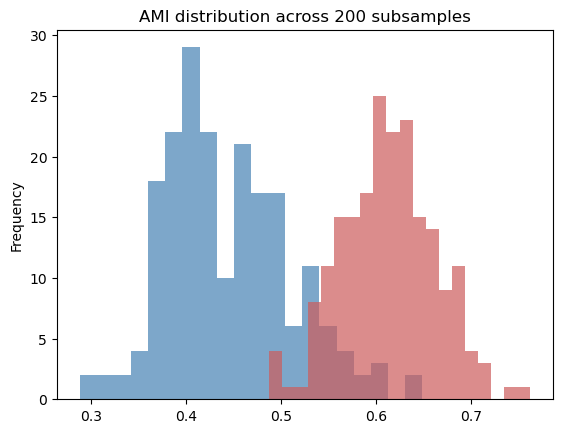

In [8]:
import matplotlib.pyplot as plt
summary["ari"].plot.hist(bins=20, alpha=0.7, color="steelblue")
plt.title("ARI distribution across 200 subsamples")
plt.ylabel("Frequency")

summary["ami"].plot.hist(bins=20, alpha=0.7, color="indianred")
plt.title("AMI distribution across 200 subsamples")

## behavior across iterations

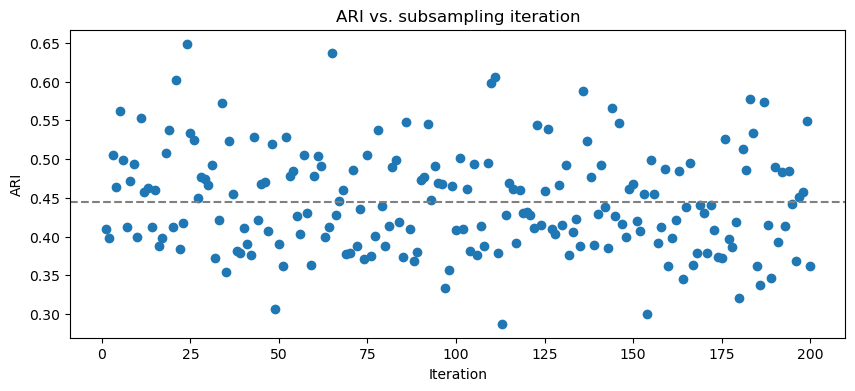

In [9]:
plt.figure(figsize=(10,4))
plt.plot(summary["iteration"], summary["ari"], marker="o", ls="none")
plt.axhline(summary["ari"].mean(), color="gray", ls="--")
plt.xlabel("Iteration")
plt.ylabel("ARI")
plt.title("ARI vs. subsampling iteration")
plt.show()

## Synthetic data

In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd

REPO_ROOT = Path("..").resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

from apclust import run_mcss_ap

DATA_ROOT = REPO_ROOT / "Data"
synthetic = pd.read_csv(DATA_ROOT / "samples_original_1.csv", header=None)
X = synthetic.to_numpy(dtype=np.float64)

OUTPUT_BASE = REPO_ROOT / "results" / "mcss" / "synthetic_original"

for damping in (0.50, 0.85):
    run_mcss_ap(
        X,
        dataset_name=f"damping{damping:.2f}",
        out_dir=OUTPUT_BASE,
        b=200,
        train_frac=0.80,
        random_seed=0,
        ap_params={
            "damping": damping,
            "max_iter": 400,
            "convergence_iter": 50,
            "random_state": 0,   # deterministic AP fits
            "affinity": "euclidean",
        },
        metrics=("ari", "ami"),
    )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: Co

In [2]:
import pandas as pd

for damping in (0.50, 0.85):
    summary = pd.read_csv(OUTPUT_BASE / f"damping{damping:.2f}" / "mcss_summary.csv")
    mean_k = summary["train_n_clusters"].mean()
    var_k = summary["train_n_clusters"].var()
    mode_k = summary["train_n_clusters"].mode()[0]
    mode_pct = (summary["train_n_clusters"] == mode_k).mean() * 100
    conv_pct = summary["train_converged"].mean() * 100

    print(f"damping={damping:.2f}")
    print(f"  E[K]      : {mean_k:.3f}")
    print(f"  Var[K]    : {var_k:.3f}")
    print(f"  Mode[K]   : {mode_k} ({mode_pct:.1f} %)")
    print(f"  %Converged: {conv_pct:.1f} %\n")

damping=0.50
  E[K]      : 7.435
  Var[K]    : 64.971
  Mode[K]   : 4 (75.0 %)
  %Converged: 69.0 %

damping=0.85
  E[K]      : 4.000
  Var[K]    : 0.000
  Mode[K]   : 4 (100.0 %)
  %Converged: 100.0 %



In [ ]:
from pathlib import Path
import sys

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

REPO_ROOT = Path("..").resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

from apclust import run_mcss_ap

# 1. Load the synthetic matrix (rows = samples, columns = features)
DATA_ROOT = REPO_ROOT / "Data"
synthetic = pd.read_csv(DATA_ROOT / "samples_original_1.csv", header=None)

X = synthetic.to_numpy()

# 3. Standardize the columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 4. Run MCSS for the desired damping/max_iter settings
OUTPUT_ROOT = REPO_ROOT / "results" / "mcss" / "synthetic_p100"
run_mcss_ap(
    X_std,
    dataset_name="damping0.5",
    out_dir=OUTPUT_ROOT,
    b=200,
    train_frac=0.8,
    random_seed=0,
    ap_params={"damping": 0.5, "max_iter": 400, "convergence_iter": 50, "random_state": None},
    metrics=("ari", "ami"),
)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: Co

In [2]:
import pandas as pd
samples = pd.read_csv(DATA_ROOT / "samples_original_1.csv", header=None)
X = samples.to_numpy()  
print("t =", X.shape[0], "rows; p =", X.shape[1], "features")

t = 100 rows; p = 1000 features


In [3]:
import pandas as pd

result_dir = REPO_ROOT / "results" / "mcss" / "synthetic_p100" / "damping0.5"
summary = pd.read_csv(result_dir / "mcss_summary.csv")

In [4]:
mean_k = summary["train_n_clusters"].mean()
var_k = summary["train_n_clusters"].var()
mode_k = summary["train_n_clusters"].mode()[0]
mode_fraction = (summary["train_n_clusters"] == mode_k).mean() * 100
convergence_rate = summary["train_converged"].mean() * 100

In [5]:
mean_k, var_k, mode_k, mode_fraction, convergence_rate

(np.float64(8.205),
 88.4351507537688,
 np.int64(4),
 np.float64(72.5),
 np.float64(68.0))

In [ ]:
# different damping 

In [6]:

OUTPUT_ROOT = REPO_ROOT / "results" / "mcss" / "synthetic_p100"
run_mcss_ap(
    X_std,
    dataset_name="damping0.85",
    out_dir=OUTPUT_ROOT,
    b=200,
    train_frac=0.8,
    random_seed=0,
    ap_params={"damping": 0.85, "max_iter": 400, "convergence_iter": 50, "random_state": None},
    metrics=("ari", "ami"),
)


In [7]:
import pandas as pd

result_dir = REPO_ROOT / "results" / "mcss" / "synthetic_p100" / "damping0.85"
summary = pd.read_csv(result_dir / "mcss_summary.csv")

In [8]:
mean_k = summary["train_n_clusters"].mean()
var_k = summary["train_n_clusters"].var()
mode_k = summary["train_n_clusters"].mode()[0]
mode_fraction = (summary["train_n_clusters"] == mode_k).mean() * 100
convergence_rate = summary["train_converged"].mean() * 100

In [10]:
mean_k, var_k, mode_k, mode_fraction, convergence_rate

(np.float64(4.0), 0.0, np.int64(4), np.float64(100.0), np.float64(100.0))